# Market Basket Analysis (Apriori Algo)

In [1]:
#import the Files and data:
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets CSV\OnlineRetail.csv")

In [2]:
#print the data :
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

<AxesSubplot:>

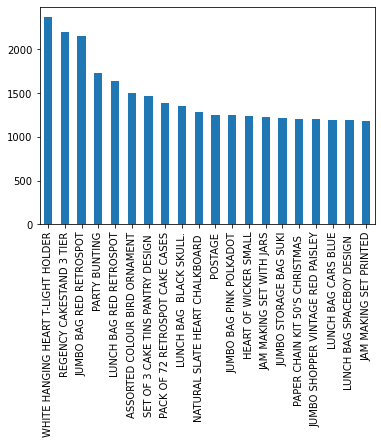

In [4]:
#plot the description of data : 
data["Description"].value_counts().head(20).plot.bar()


In [12]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [4]:
basket_=(data[data["Country"]=="Canada"].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0).reset_index().set_index('InvoiceNo'))
basket_

Description,10 COLOUR SPACEBOY PEN,12 PENCILS TALL TUBE POSY,4 TRADITIONAL SPINNING TOPS,60 CAKE CASES DOLLY GIRL DESIGN,ABC TREASURE BOOK BOX,AIRLINE BAG VINTAGE WORLD CHAMPION,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE RED,APRON APPLE DELIGHT,ASSORTED COLOUR BIRD ORNAMENT,...,"WHITE TEA,COFFEE,SUGAR JARS",WOODEN SCHOOL COLOURING SET,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BAD HAIR DAY,WRAP CAROUSEL,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP GREEN PEARS,WRAP RED APPLES,YELLOW COAT RACK PARIS FASHION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
546533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557322,0.0,0.0,0.0,24.0,8.0,4.0,4.0,4.0,4.0,0.0,...,0.0,12.0,288.0,25.0,25.0,25.0,25.0,25.0,25.0,0.0
559557,24.0,24.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
560187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# basket_=(data[data["Country"]=="Germany"].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0).reset_index().set_index('InvoiceNo'))
# basket_

In [6]:
def con(x):
    if x>=1:
        return 1
    if x<=1:
        return 0

new_basket=basket_.applymap(con)
new_basket.head(5)

Description,10 COLOUR SPACEBOY PEN,12 PENCILS TALL TUBE POSY,4 TRADITIONAL SPINNING TOPS,60 CAKE CASES DOLLY GIRL DESIGN,ABC TREASURE BOOK BOX,AIRLINE BAG VINTAGE WORLD CHAMPION,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE RED,APRON APPLE DELIGHT,ASSORTED COLOUR BIRD ORNAMENT,...,"WHITE TEA,COFFEE,SUGAR JARS",WOODEN SCHOOL COLOURING SET,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BAD HAIR DAY,WRAP CAROUSEL,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP GREEN PEARS,WRAP RED APPLES,YELLOW COAT RACK PARIS FASHION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
546533,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
551736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557322,0,0,0,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,0
559557,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
560187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
freq=apriori(new_basket,min_support=0.19,use_colnames=True)
freq



,support,itemsets
0,0.333333,(BUNDLE OF 3 ALPHABET EXERCISE BOOKS)
1,0.333333,(BUNDLE OF 3 SCHOOL EXERCISE BOOKS )
2,0.333333,(COLOURING PENCILS BROWN TUBE)
3,0.333333,"(BUNDLE OF 3 ALPHABET EXERCISE BOOKS, BUNDLE O..."
4,0.333333,"(COLOURING PENCILS BROWN TUBE, BUNDLE OF 3 ALP..."
5,0.333333,"(COLOURING PENCILS BROWN TUBE, BUNDLE OF 3 SCH..."
6,0.333333,"(COLOURING PENCILS BROWN TUBE, BUNDLE OF 3 ALP..."


In [14]:
# making assosiation rules
rules=association_rules(freq,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),(BUNDLE OF 3 SCHOOL EXERCISE BOOKS ),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
1,(BUNDLE OF 3 SCHOOL EXERCISE BOOKS ),(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
2,(COLOURING PENCILS BROWN TUBE),(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
3,(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),(COLOURING PENCILS BROWN TUBE),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
4,(COLOURING PENCILS BROWN TUBE),(BUNDLE OF 3 SCHOOL EXERCISE BOOKS ),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
5,(BUNDLE OF 3 SCHOOL EXERCISE BOOKS ),(COLOURING PENCILS BROWN TUBE),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
6,"(COLOURING PENCILS BROWN TUBE, BUNDLE OF 3 ALP...",(BUNDLE OF 3 SCHOOL EXERCISE BOOKS ),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
7,"(COLOURING PENCILS BROWN TUBE, BUNDLE OF 3 SCH...",(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
8,"(BUNDLE OF 3 ALPHABET EXERCISE BOOKS, BUNDLE O...",(COLOURING PENCILS BROWN TUBE),0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf
9,(COLOURING PENCILS BROWN TUBE),"(BUNDLE OF 3 ALPHABET EXERCISE BOOKS, BUNDLE O...",0.333333,0.333333,0.333333,1.0,3.0,0.222222,inf


In [10]:
#for germeny
rules=association_rules(freq,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.087894,0.620232,0.076285,0.867925,1.399354,0.021771,2.875385
1,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE ),0.620232,0.087894,0.076285,0.122995,1.399354,0.021771,1.040023
2,(POSTAGE),(PLASTERS IN TIN SPACEBOY),0.620232,0.081260,0.076285,0.122995,1.513587,0.025885,1.047587
3,(PLASTERS IN TIN SPACEBOY),(POSTAGE),0.081260,0.620232,0.076285,0.938776,1.513587,0.025885,6.202875
4,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.104478,0.620232,0.089552,0.857143,1.381971,0.024752,2.658375
5,(POSTAGE),(PLASTERS IN TIN WOODLAND ANIMALS),0.620232,0.104478,0.089552,0.144385,1.381971,0.024752,1.046642
6,(POSTAGE),(REGENCY CAKESTAND 3 TIER),0.620232,0.104478,0.091211,0.147059,1.407563,0.026410,1.049923
7,(REGENCY CAKESTAND 3 TIER),(POSTAGE),0.104478,0.620232,0.091211,0.873016,1.407563,0.026410,2.990672
8,(POSTAGE),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.620232,0.119403,0.114428,0.184492,1.545120,0.040370,1.079814
9,(ROUND SNACK BOXES SET OF 4 FRUITS ),(POSTAGE),0.119403,0.620232,0.114428,0.958333,1.545120,0.040370,9.114428
